In [1]:
import cv2
import sys
import pytesseract
import Database
from IPython.display import Image

In [2]:
arrFrames = []

In [3]:
def getStringInRect(x,y,width,height):
  imPath = "images/page_1.png"  
  # Uncomment the line below to provide path to tesseract manually
  # pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
 
  # Define config parameters.
  # '-l eng'  for using the English language
  # '--oem 1' for using LSTM OCR Engine
  config = ('-l eng --oem 1 --psm 3')
 
  # Read image from disk
  im = cv2.imread(imPath, cv2.IMREAD_COLOR)

  crop_img = im[y:y+height, x:x+width]
  text = pytesseract.image_to_string(crop_img, config=config)
  return text

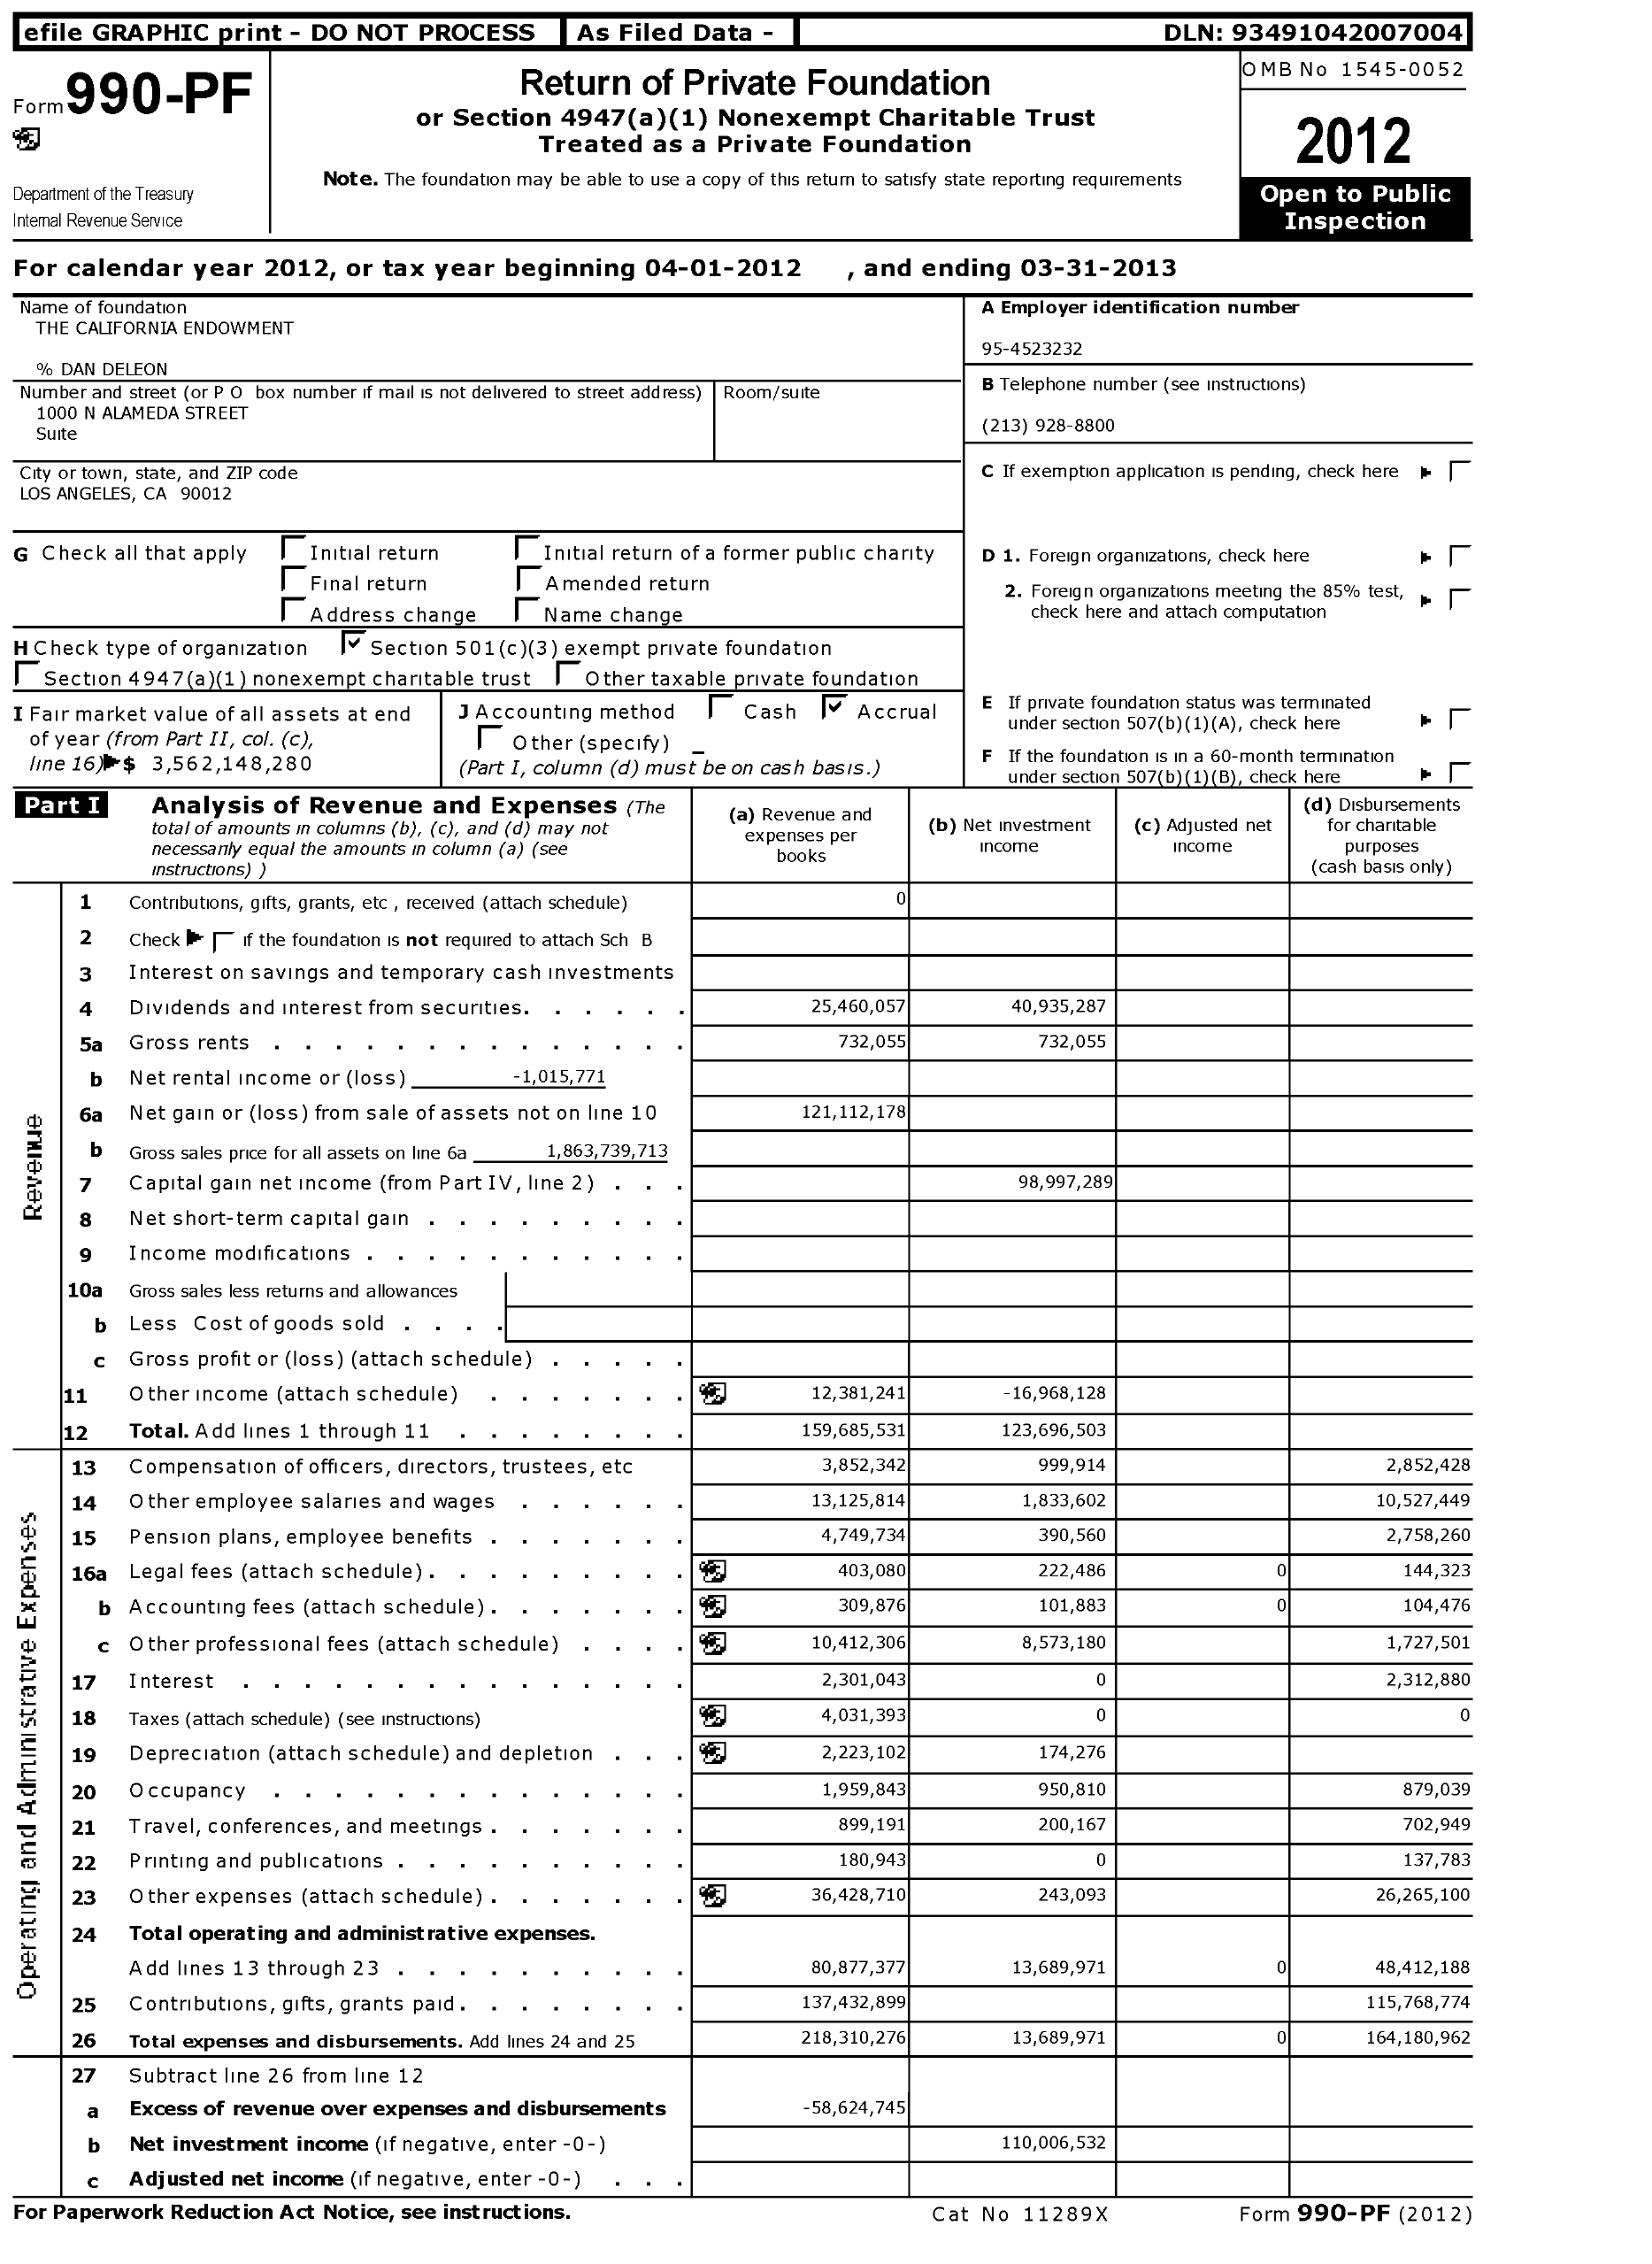

In [4]:
Image("images/page_1.png")

In [5]:
def plotSquare(x,y,width,height):
  imPath = "images/page_1.png"  
  # Uncomment the line below to provide path to tesseract manually
  # pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
 
  # Define config parameters.
  # '-l eng'  for using the English language
  # '--oem 1' for using LSTM OCR Engine
  config = ('-l eng --oem 1 --psm 3')
 
  # Read image from disk
  im = cv2.imread(imPath, cv2.IMREAD_COLOR)
  cv2.rectangle(im, (x, y), (x+width, y+height), (255,0,0), 2)
  cv2.imwrite("me.png",im)

In [6]:
def findStringInRange(strFind,x,y,maxWidth,maxHeight):
  width = 10
  height = 10

  while height < maxHeight:
    width = 10
    while width < maxWidth:
      strTmpText = getStringInRect(x,y,width,height)
      if strTmpText == strFind:
        return x,y,width,height
      else:
        width = width + 5
    height = height + 5

In [7]:
if __name__ == '__main__':
 
  if len(sys.argv) < 1:
    print('Usage: python ocr_simple.py image.jpg')
    sys.exit(1)

strTmpText = "Contributions, gifts, grants, etc , received "
#plotSquare(10,430,790,25)
text =  getStringInRect(10,430,790,25)
print(text)
print("---------------------------------------------------------------------------------------")

Number and street (or PO box number if mail is not delivered to street address)
---------------------------------------------------------------------------------------


In [8]:
def readAT(x,y,width,height,type="dynamic",caption=""):
    text =  getStringInRect(x,y,width,height)
    plotSquare(x,y,width,height)
    
    dictTmpFrame = {}
    dictTmpFrame["frame"] = {"x":x,"y":y,"width":width,"height":height}
    dictTmpFrame["type"] = type
    dictTmpFrame["caption"] = caption
    if type == "static":
        dictTmpFrame["value"] = text
    elif type == "dynamic":
        dictTmpFrame["value"] = text
    
    arrFrames.append(dictTmpFrame.copy())
    print(text)
    print("---------------------------------------------------------------------------------------")

In [9]:
readAT(10,340,1070,20)
readAT(10,360,1070,70)
# Image("me.png")

Name of foundation
---------------------------------------------------------------------------------------
THE CALIFORNIA ENDOWMENT

% DAN DELEON
---------------------------------------------------------------------------------------



---------------------------------------------------------------------------------------


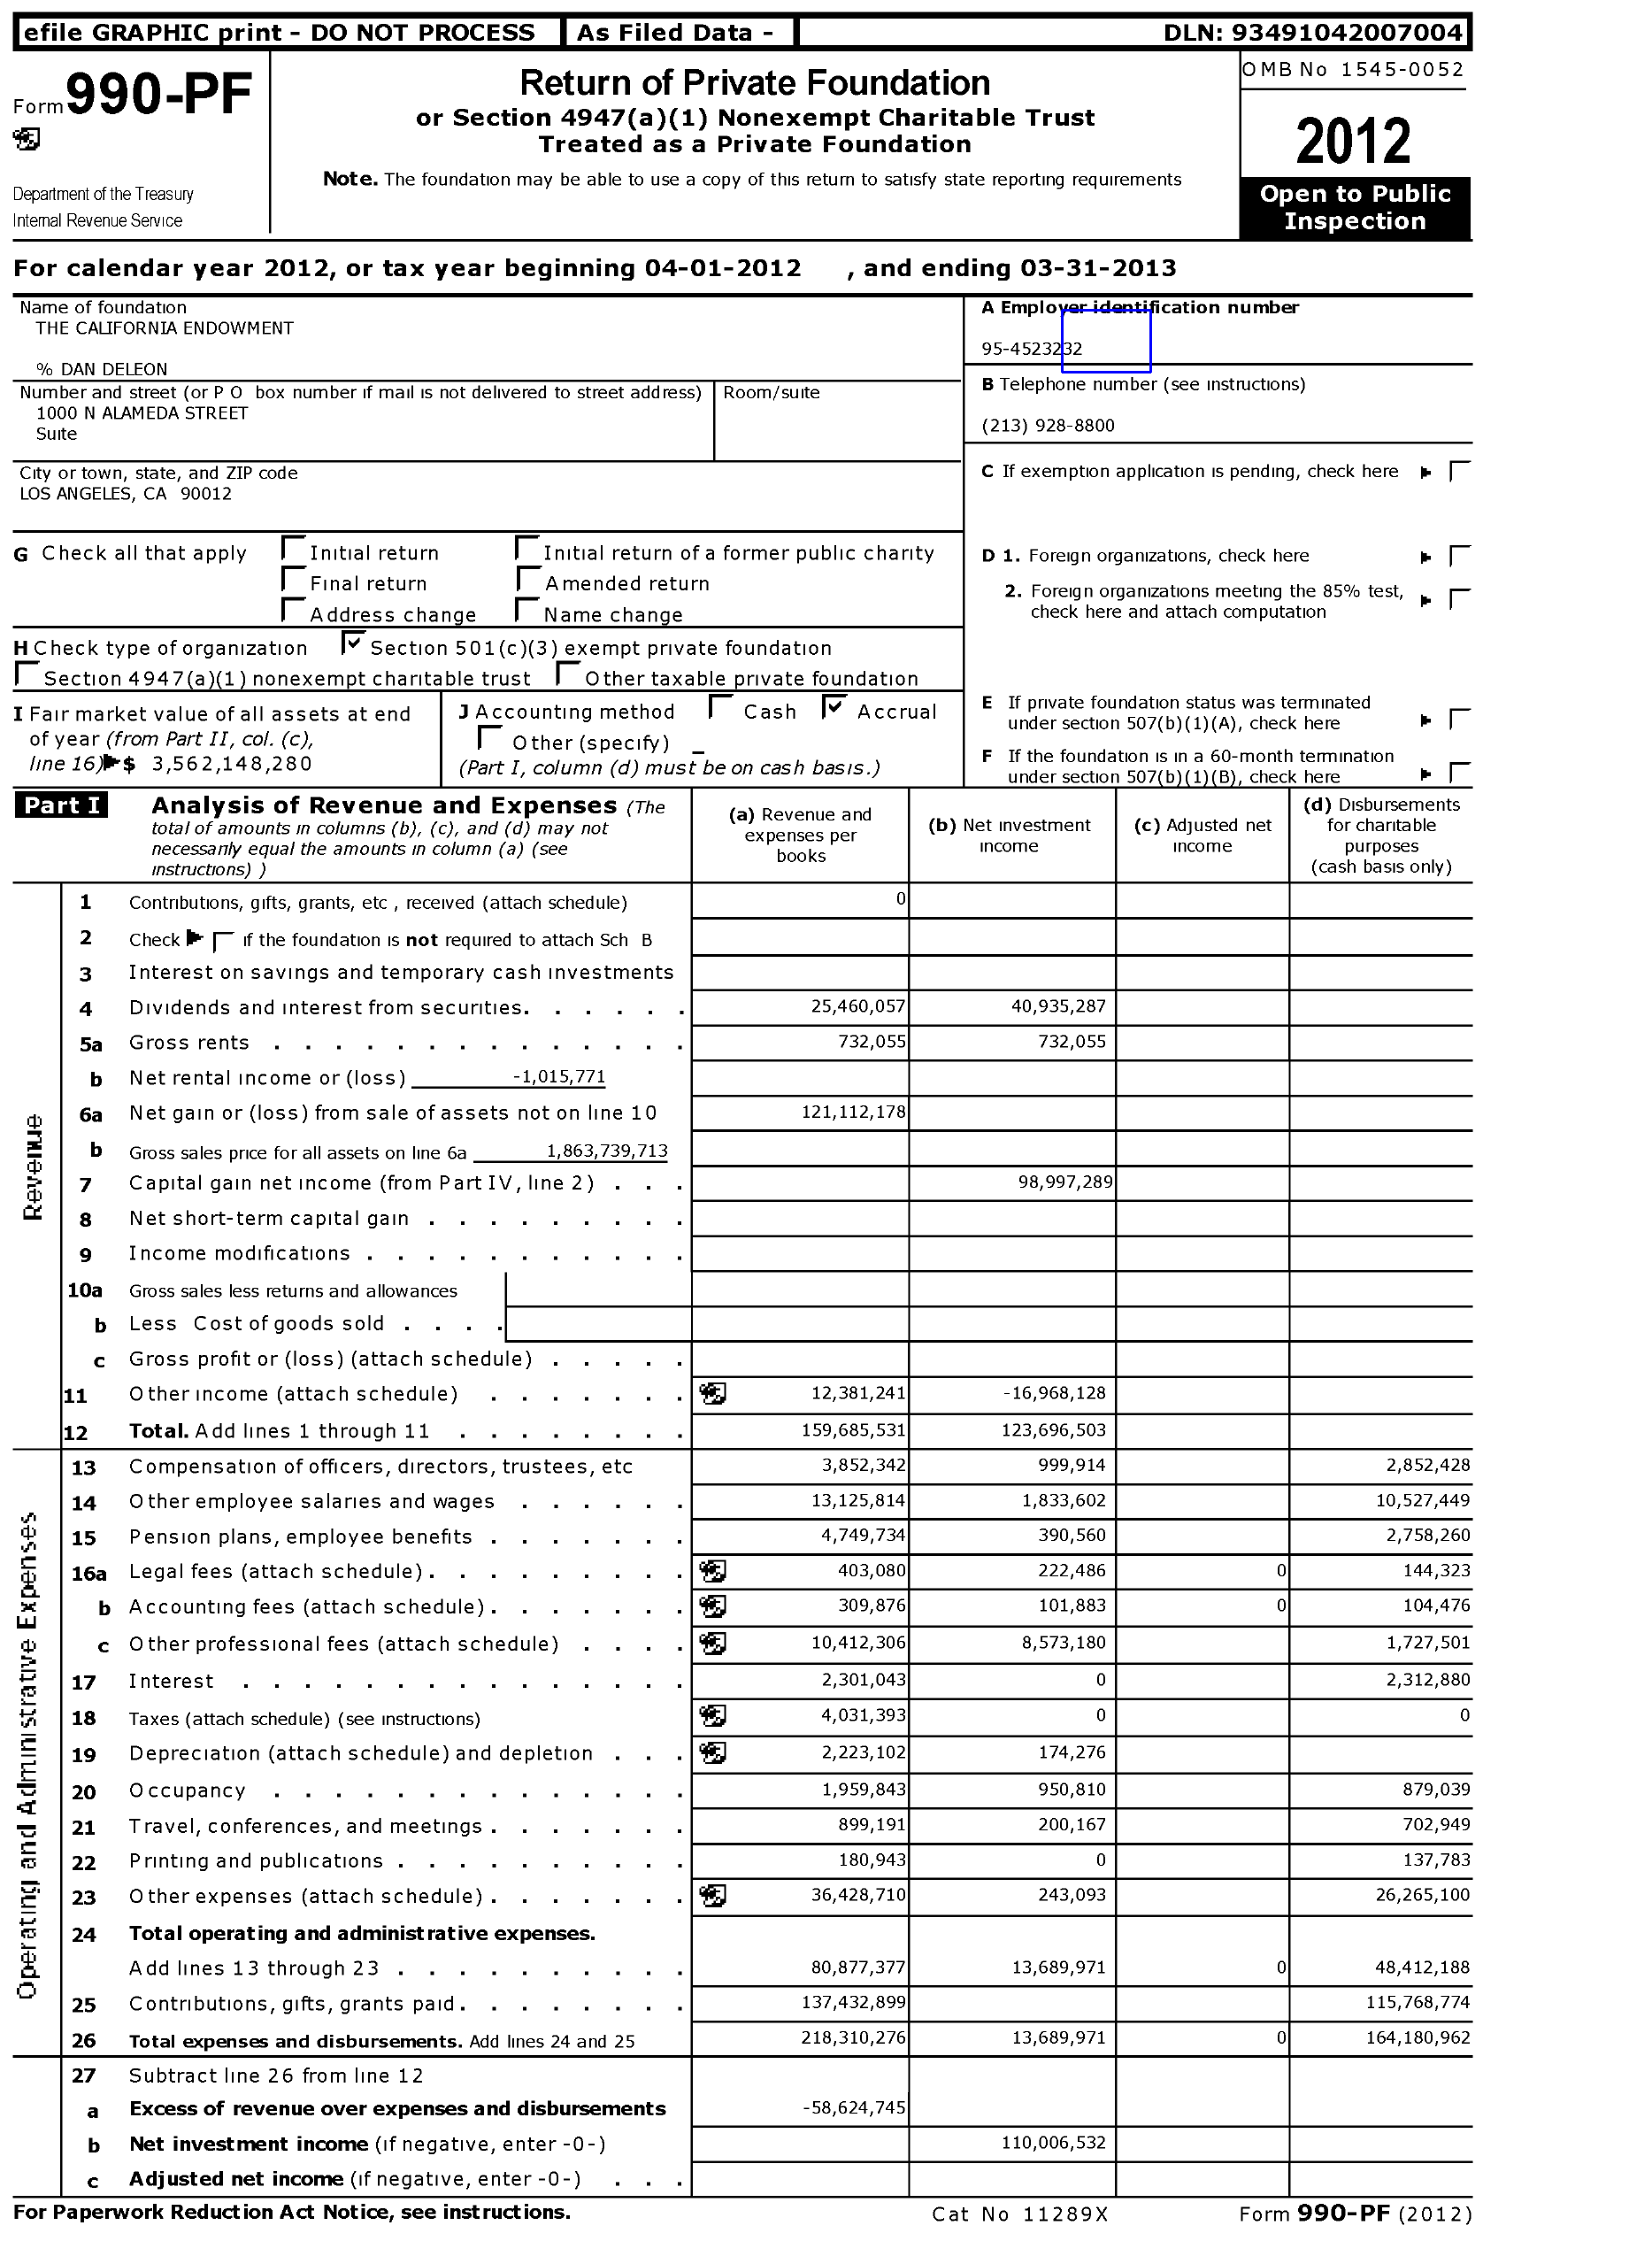

In [10]:
readAT(1200,350,100,70)
Image("me.png")

In [11]:
readAT(10,430,790,25)
readAT(10,455,790,65)
# Image("me.png")

Number and street (or PO box number if mail is not delivered to street address)
---------------------------------------------------------------------------------------
1000 N ALAMEDA STREET
Suite
---------------------------------------------------------------------------------------


In [12]:
readAT(810,430,270,25)
readAT(810,455,270,65)
# Image("me.png")

Room/suite
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [13]:
readAT(10,520,1060,25)
readAT(10,540,1060,60)
# Image("me.png")

City or town, state, and ZIP code
---------------------------------------------------------------------------------------
LOS ANGELES, CA 90012
---------------------------------------------------------------------------------------


In [14]:
readAT(1095,340,580,20)
readAT(1095,360,580,50)
# Image("me.png")

A Employer identification number
---------------------------------------------------------------------------------------
95-4523232
---------------------------------------------------------------------------------------


In [15]:
readAT(1095,420,580,25)
readAT(1095,445,580,55)
# Image("me.png")

B Telephone number (see instructions)
---------------------------------------------------------------------------------------
(213) 928-8800
---------------------------------------------------------------------------------------


C If exemption application is pending, check here
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


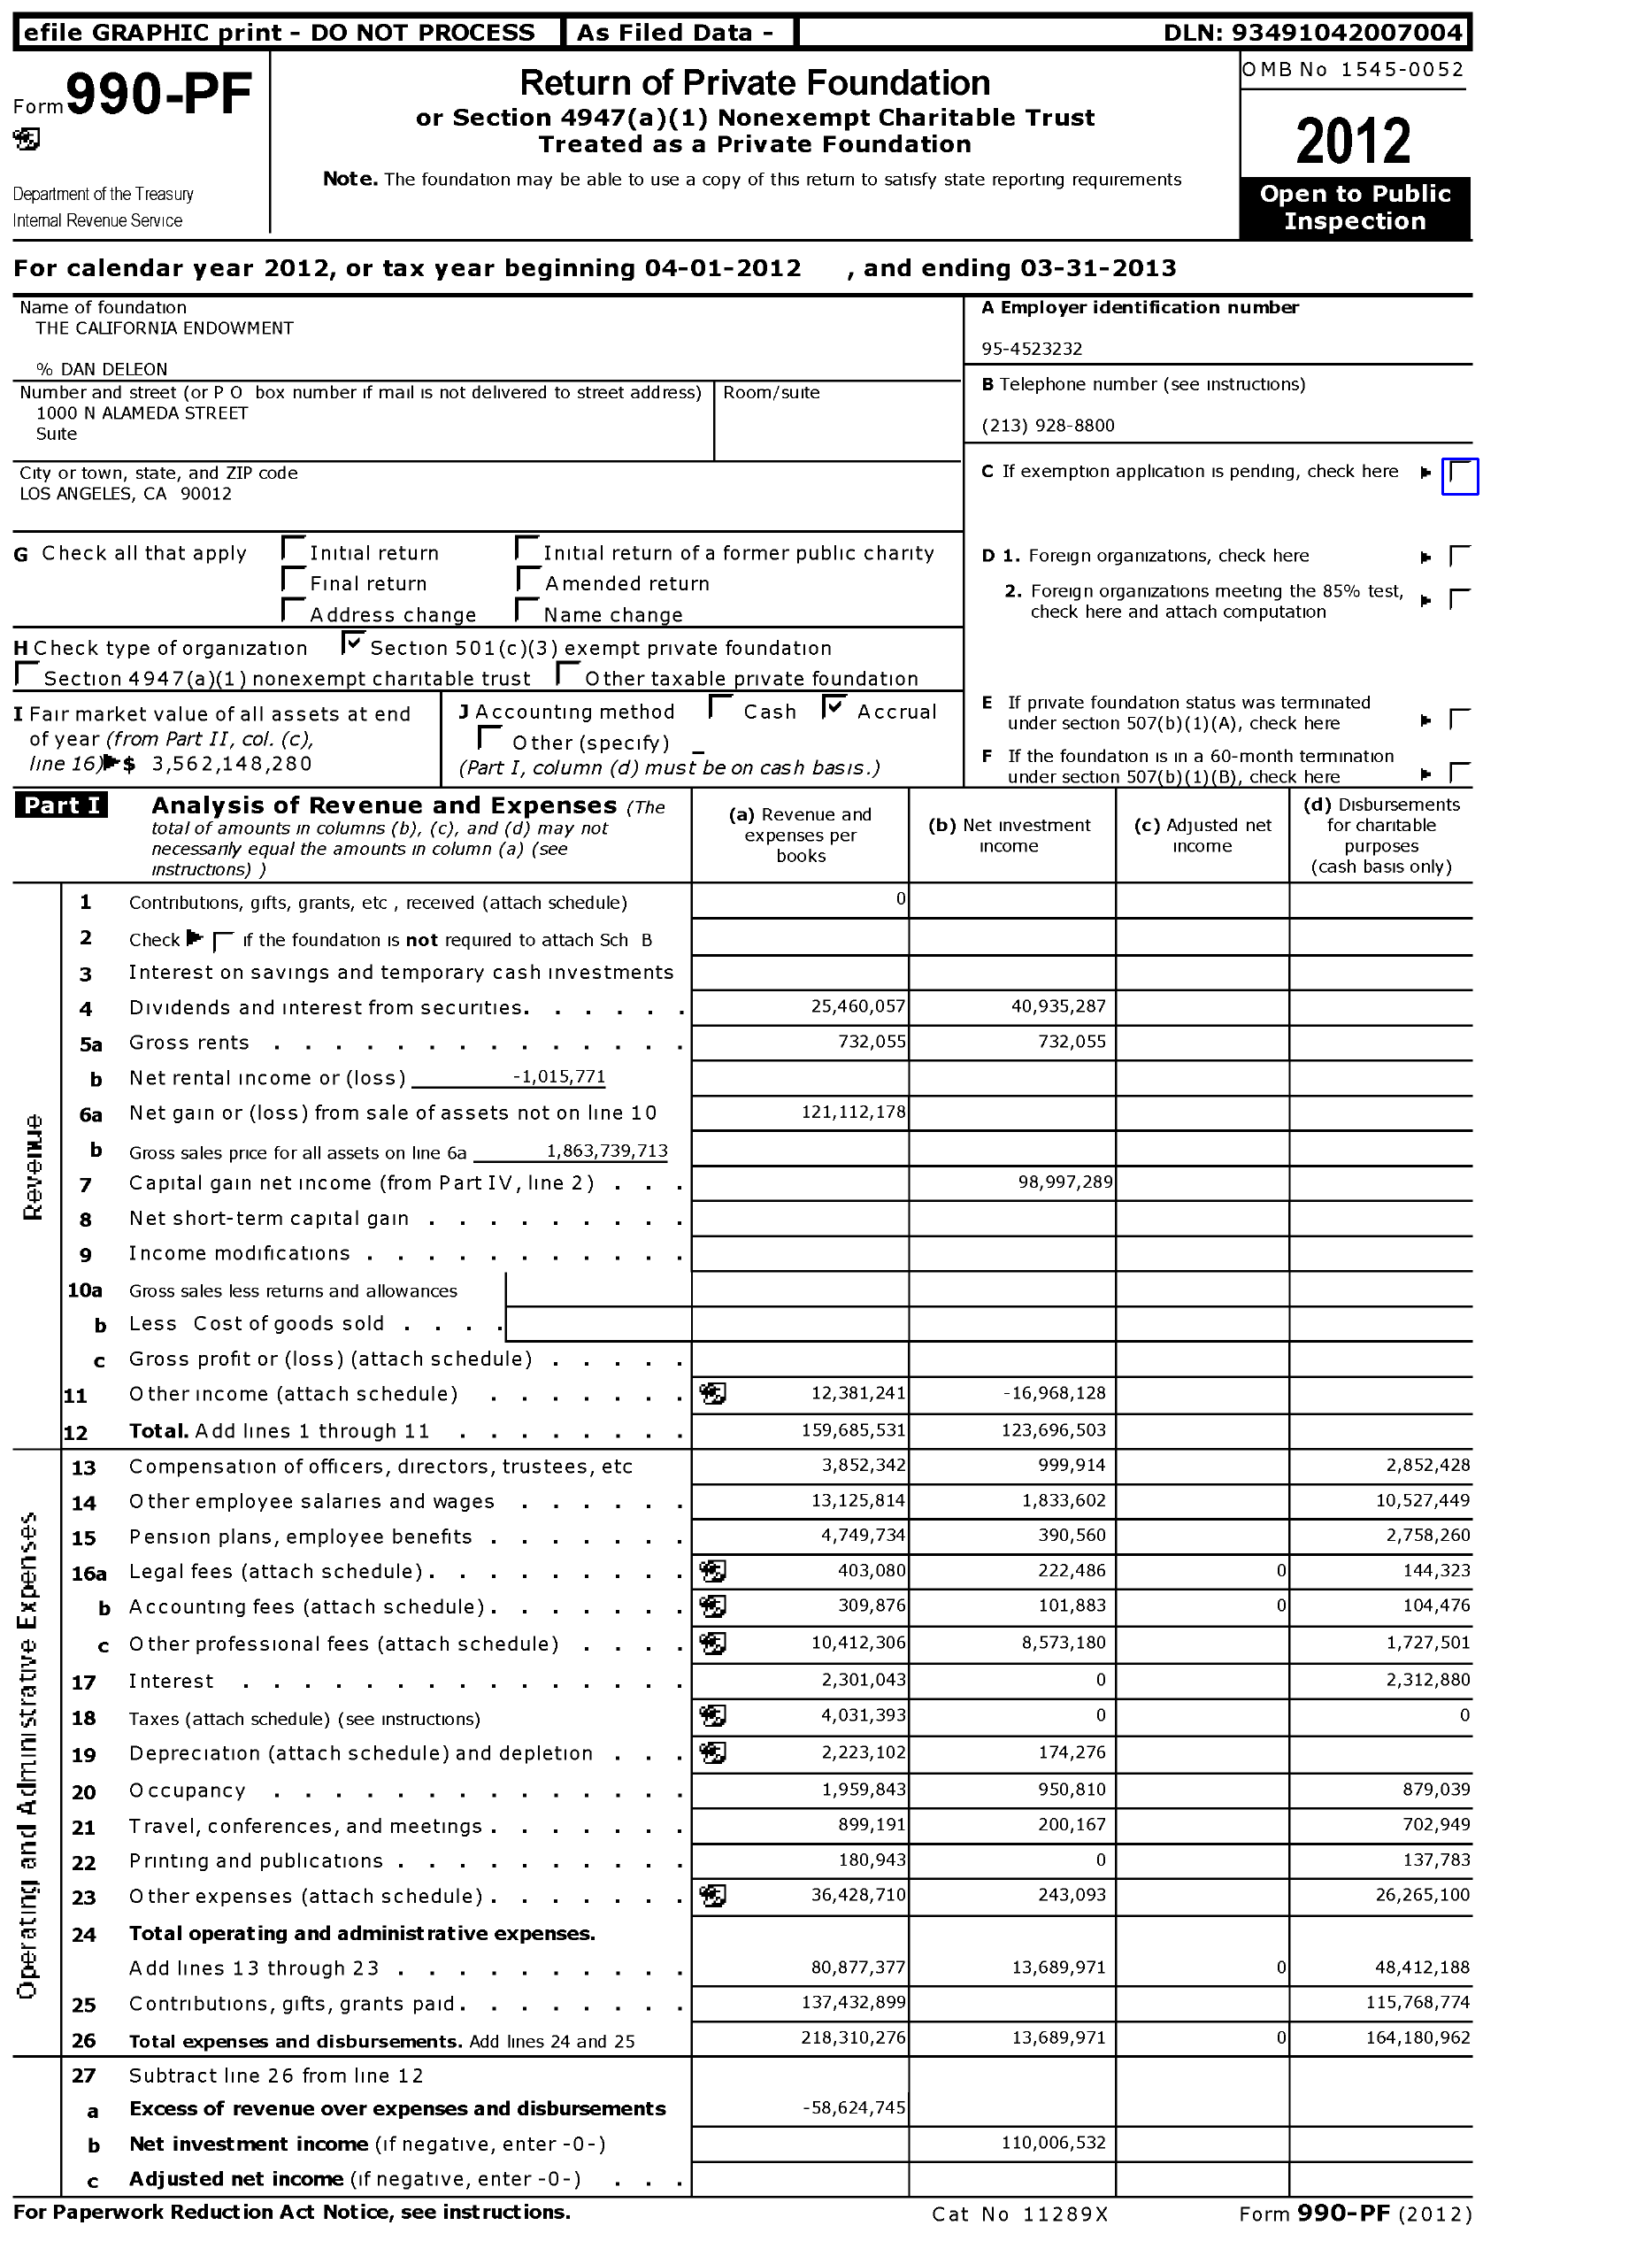

In [16]:
readAT(1095,518,500,25)
readAT(1630,518,40,40, type="checkbox")
Image("me.png")

In [17]:
readAT(1095,615,500,25)
readAT(1630,615,40,40, type="checkbox")
readAT(1095,655,500,45)
readAT(1630,655,40,40, type="checkbox")
# Image("me.png")

D 1. Foreign organizations, check here
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
2. Foreign organizations meeting the 85% test,
check here and attach computation
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [18]:
readAT(1095,780,500,55)
readAT(1630,790,40,40, type="checkbox",caption="Yes")
readAT(1095,845,500,40)
readAT(1630,855,40,40, type="checkbox", caption="Yes")
# Image("me.png")

E If private foundation status was terminated
under section 507(b)(1)(A), check here
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
F If the foundation Is in a 60-month termination
under section 507(b)(1)(B). check here
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [19]:
readAT(10,600,300,55)
readAT(315,600,35,35, type="checkbox",caption="Initial return")
readAT(315,635,35,35, type="checkbox",caption="Final return")
readAT(315,670,35,35, type="checkbox",caption="Address change")
readAT(578,600,35,35, type="checkbox",caption="Initial return of a former public charity")
readAT(578,635,35,35, type="checkbox",caption="Amended return")
readAT(578,670,35,35, type="checkbox",caption="Name change")
# Image("me.png")

G Check all that apply
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [20]:
readAT(10,710,340,35)
readAT(380,710,35,35, type="checkbox", caption="Section 501(c)(3)exempt private foundation")
readAT(10,745,35,35, type="checkbox", caption="Section 4947(a)(1) nonexempt charitable trust")
readAT(625,745,35,35, type="checkbox", caption="Other texable private foundation")
# Image("me.png")

H Check type of organization
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [21]:
readAT(10,780,470,105)
# Image("me.png")

I Fair market value of all assets at end
of year (from Part II, col. (c),
line 16)$ 3,562,148,280
---------------------------------------------------------------------------------------


JAccounting method
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


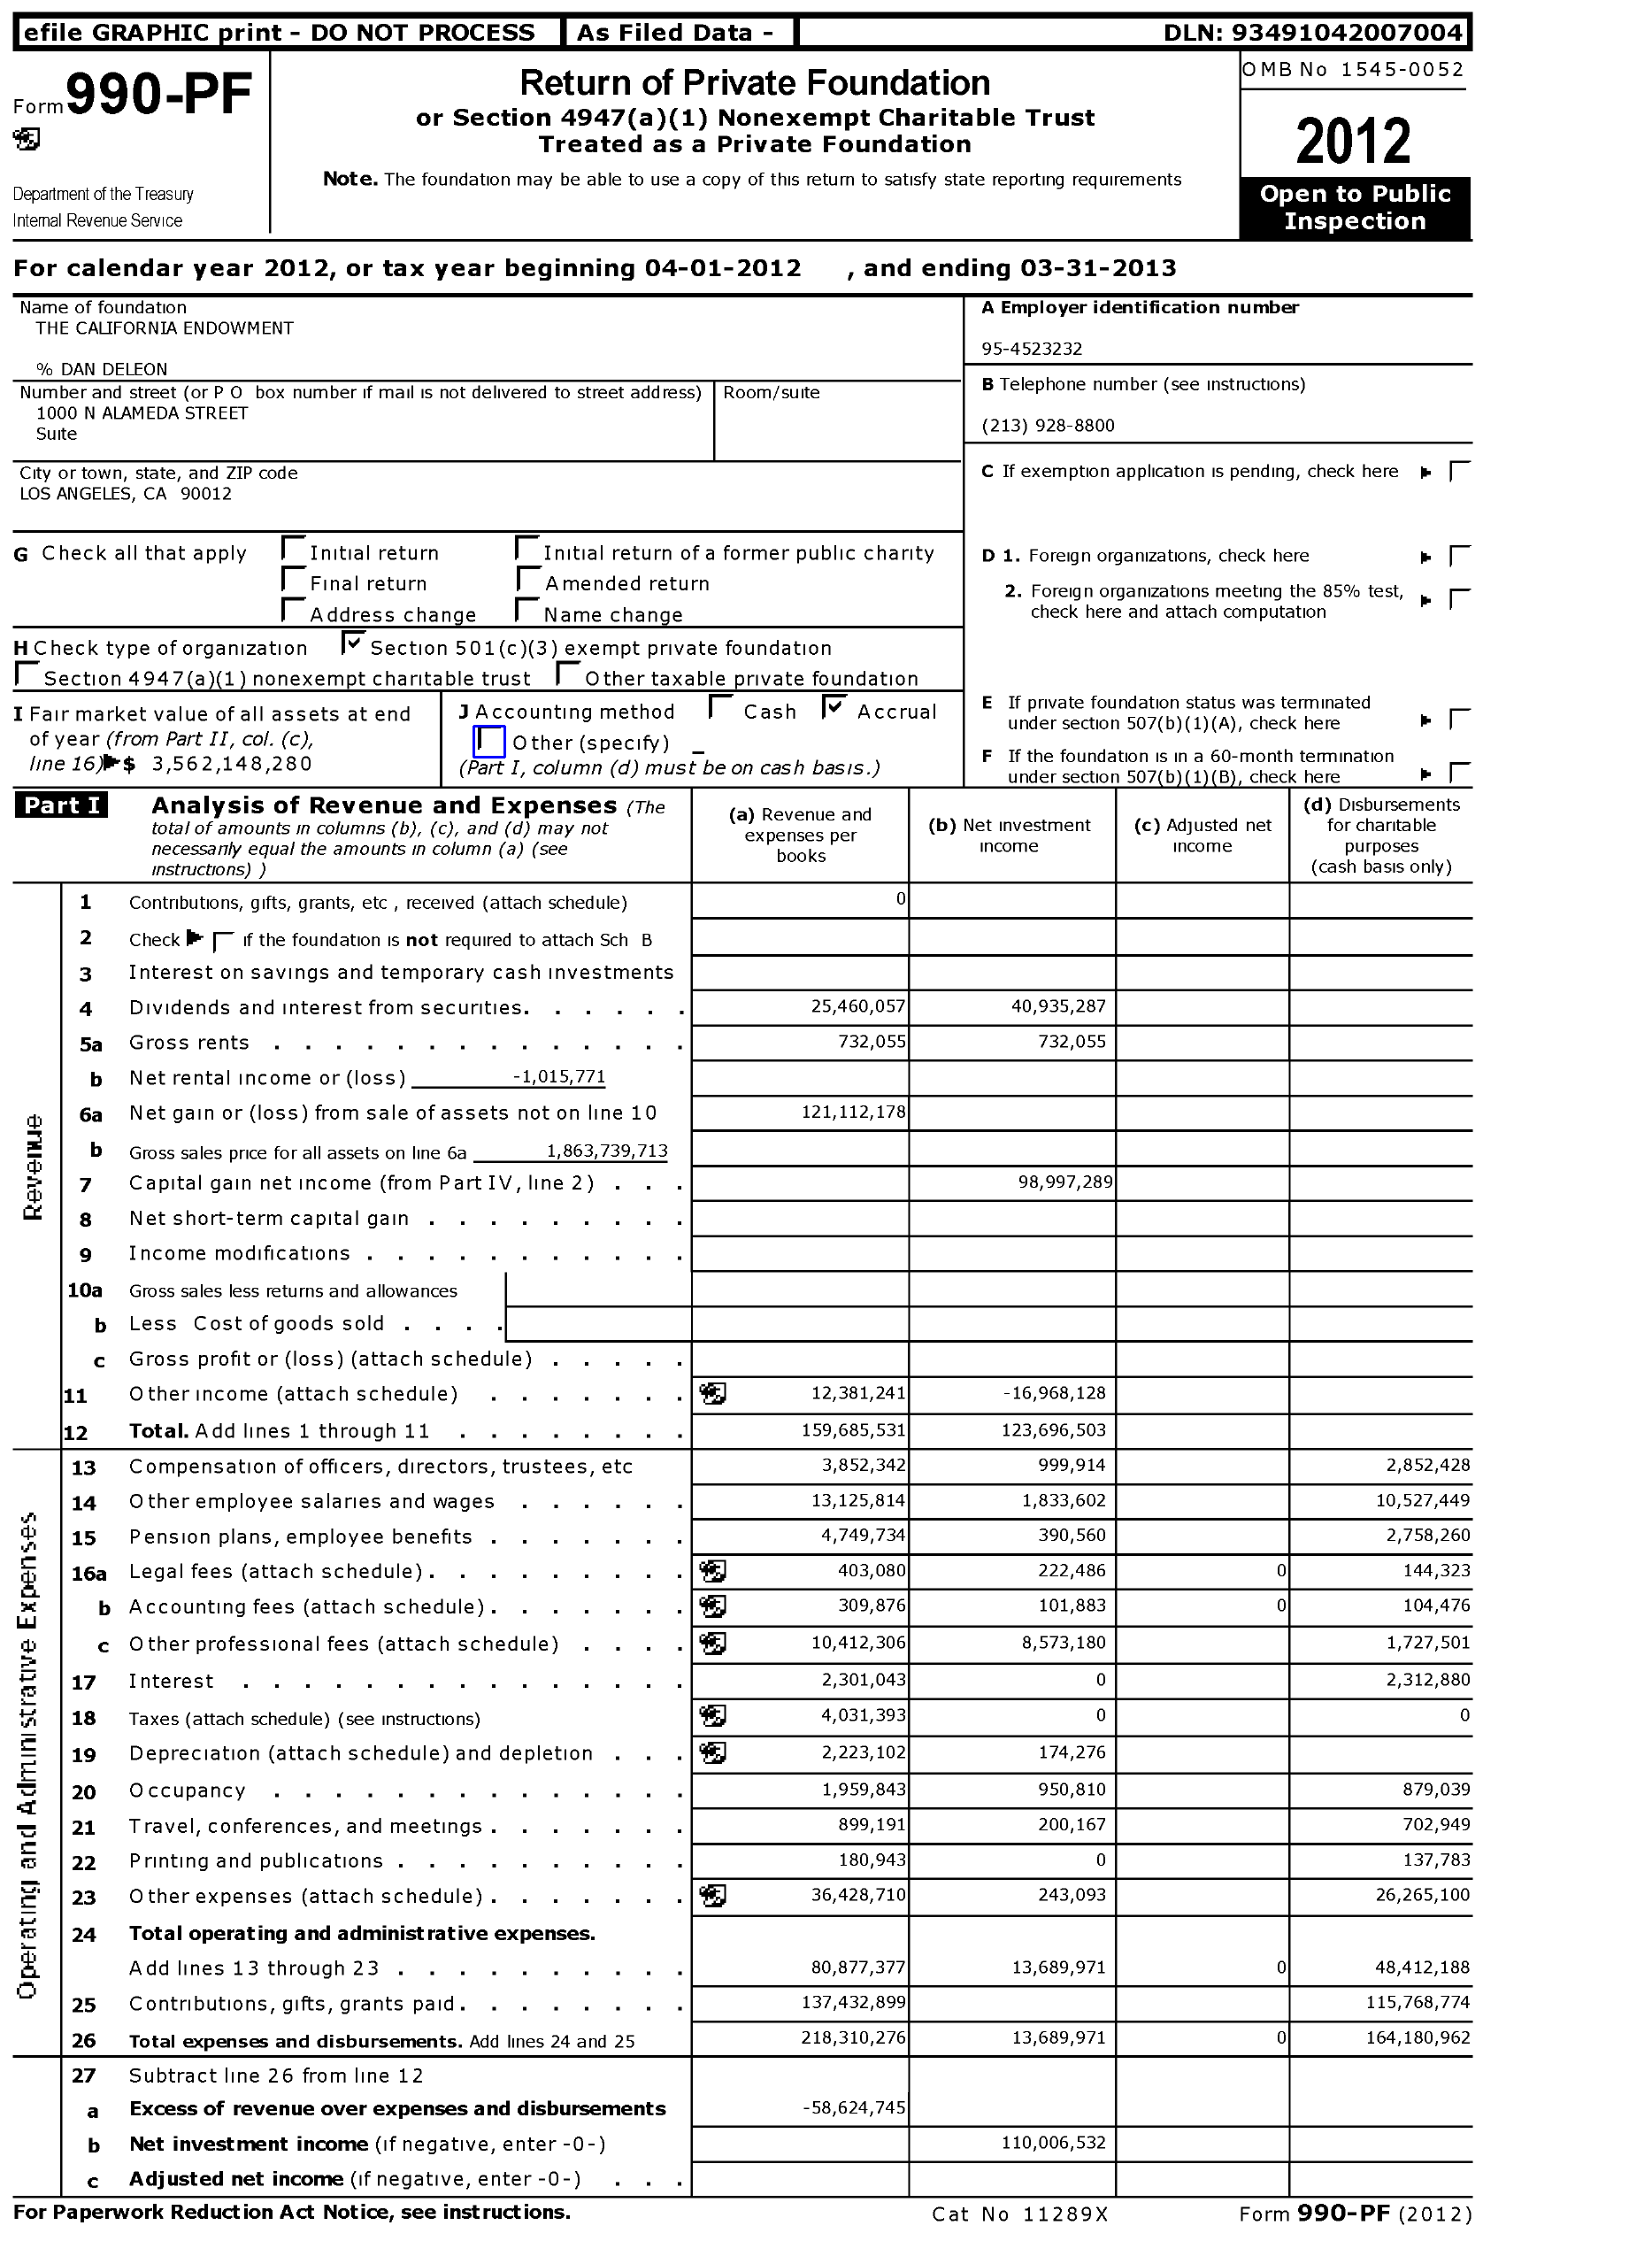

In [22]:
readAT(500,780,300,35)
readAT(800,780,35,35, type="checkbox",caption="cash")
readAT(930,780,35,35, type="checkbox",caption="Accrual")
readAT(535,820,35,35, type="checkbox",caption="Other(specify)")
Image("me.png")

In [23]:
readAT(80,1001,700,40)
readAT(790,1001,234,30)
readAT(1024,1001,234,30)
readAT(1260,1001,195,30)
readAT(1457,1001,200,30)
# Image("me.png")

1 Contributions, gifts, grants, etc , received (attach schedule)
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [24]:
y = 1045
height = 30

readAT(80,y,700,height)
readAT(790,y,234,height, type="checkcbox")
readAT(1026,y,234,height)
readAT(1260,y,195,height)
readAT(1457,y,200,height)
# Image("me.png")

2 Check * [— if the foundation is not required to attach Sch B
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [25]:
height = 35
previousLines = 1
y1 = y + (previousLines*height)
lines = 1

#readAT(68,y6,895, lines*height + lines)

readAT(80,y1,700,lines*height + lines)
readAT(1026,y1,234,lines*height + lines)
readAT(1260,y1,195,lines*height + lines)
readAT(1457,y1,200,lines*height + lines)
# Image("me.png")

3 Interest on savings and temporary cash Investments
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [26]:
previousLines = 1
y2 = y1 + (previousLines*height)
lines = 1

readAT(80,y2,700,lines*height + lines)
readAT(800,y2,225,lines*height + lines)
readAT(1025,y2,234,lines*height + lines)
readAT(1260,y2,195,lines*height + lines)
readAT(1457,y2,200,lines*height + lines)
# Image("me.png")

4 Dividends and interest from securities. .
---------------------------------------------------------------------------------------
25,460,057
---------------------------------------------------------------------------------------
40,935,287
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [27]:
height = 40
previousLines = 1
y3 = y2 + (previousLines*height)
lines = 1

readAT(80,y3,700,lines*height + lines)
readAT(800,y3,225,lines*height + lines)
readAT(1025,y3,234,lines*height + lines)
readAT(1260,y3,195,lines*height + lines)
readAT(1457,y3,200,lines*height + lines)
# Image("me.png")

5a

Gross rents
---------------------------------------------------------------------------------------
732,055
---------------------------------------------------------------------------------------
732,055
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [28]:
previousLines = 1
y4 = y3 + (previousLines*height)
lines = 1

readAT(80,y4,700,lines*height + lines)
readAT(800,y4,225,lines*height + lines)
readAT(1025,y4,234,lines*height + lines)
readAT(1260,y4,195,lines*height + lines)
readAT(1457,y4,200,lines*height + lines)
# Image("me.png")

b_ Net rental income or (loss) -1,015,771
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [29]:
previousLines = 1
y5 = y4 + (previousLines*height)
lines = 1

readAT(80,y5,700,lines*height + lines)
readAT(800,y5,225,lines*height + lines)
readAT(1025,y5,234,lines*height + lines)
readAT(1260,y5,195,lines*height + lines)
readAT(1457,y5,200,lines*height + lines)
# Image("me.png")

6a_ Net gain or (loss) from sale of assets not on line 10
---------------------------------------------------------------------------------------
121,112,178
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [30]:
previousLines = 1
lines = 1
y6 = y5 + (previousLines*height)
tmpY = y6

readAT(80,tmpY,700,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

b Gross sales price for all assets on line 6a 1,863, 739,713
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [31]:
previousLines = 1
lines = 1
y7 = y6 + (previousLines*height)
tmpY = y7

readAT(80,tmpY,700,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

7 Capital gain net income (from Part IV, line 2)
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
98,997,289
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [32]:
previousLines = 1
lines = 1
y8 = y7 + (previousLines*height)
tmpY = y8

readAT(80,tmpY,700,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

8 Net short-term capital gain
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [33]:
previousLines = 1
lines = 1
y9 = y8 + (previousLines*height)
tmpY = y9

readAT(80,tmpY,700,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

9 Income modifications . . .
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [34]:
previousLines = 1
lines = 1
y10 = y9 + (previousLines*height)
tmpY = y10

readAT(80,tmpY,700,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

10a Gross sales less returns and allowances
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [35]:
previousLines = 1
lines = 1
y11 = y10 + (previousLines*height)
tmpY = y11

readAT(80,tmpY,480,lines*height + lines)
readAT(580,tmpY,200,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

b Less Cost of goods sold
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [36]:
previousLines = 1
lines = 1
y12 = y11 + (previousLines*height)
tmpY = y12

readAT(80,tmpY,700,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

c Gross profit or (loss) (attach schedule)
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [37]:
previousLines = 1
lines = 1
y13 = y12 + (previousLines*height)
tmpY = y13

readAT(70,tmpY,710,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

11 Other income (attach schedule) .
---------------------------------------------------------------------------------------
)

12,381,241
---------------------------------------------------------------------------------------
- 16,968,128
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [38]:
previousLines = 1
lines = 1
y14 = y13 + (previousLines*height)
tmpY = y14

readAT(70,tmpY,710,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

12

Total. Add lines 1 through 11
---------------------------------------------------------------------------------------
159,685,531
---------------------------------------------------------------------------------------
123,696,503
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [39]:
previousLines = 1
lines = 1
y15 = y14 + (previousLines*height)
tmpY = y15

readAT(70,tmpY,710,lines*height + lines)
readAT(800,tmpY,225,lines*height + lines)
readAT(1025,tmpY,234,lines*height + lines)
readAT(1260,tmpY,195,lines*height + lines)
readAT(1457,tmpY,200,lines*height + lines)
# Image("me.png")

13. Compensation of officers, directors, trustees, etc
---------------------------------------------------------------------------------------
3,852,342
---------------------------------------------------------------------------------------
999,914
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
2,852,428
---------------------------------------------------------------------------------------


14 Otheremployee salaries and wages
---------------------------------------------------------------------------------------
13,125,814
---------------------------------------------------------------------------------------
1,833,602
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
10,527,449
---------------------------------------------------------------------------------------
15 Pension plans, employee benefits
---------------------------------------------------------------------------------------
4,749,734
---------------------------------------------------------------------------------------
390,560
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
2,758,260
--------------------------------------------------------------------------

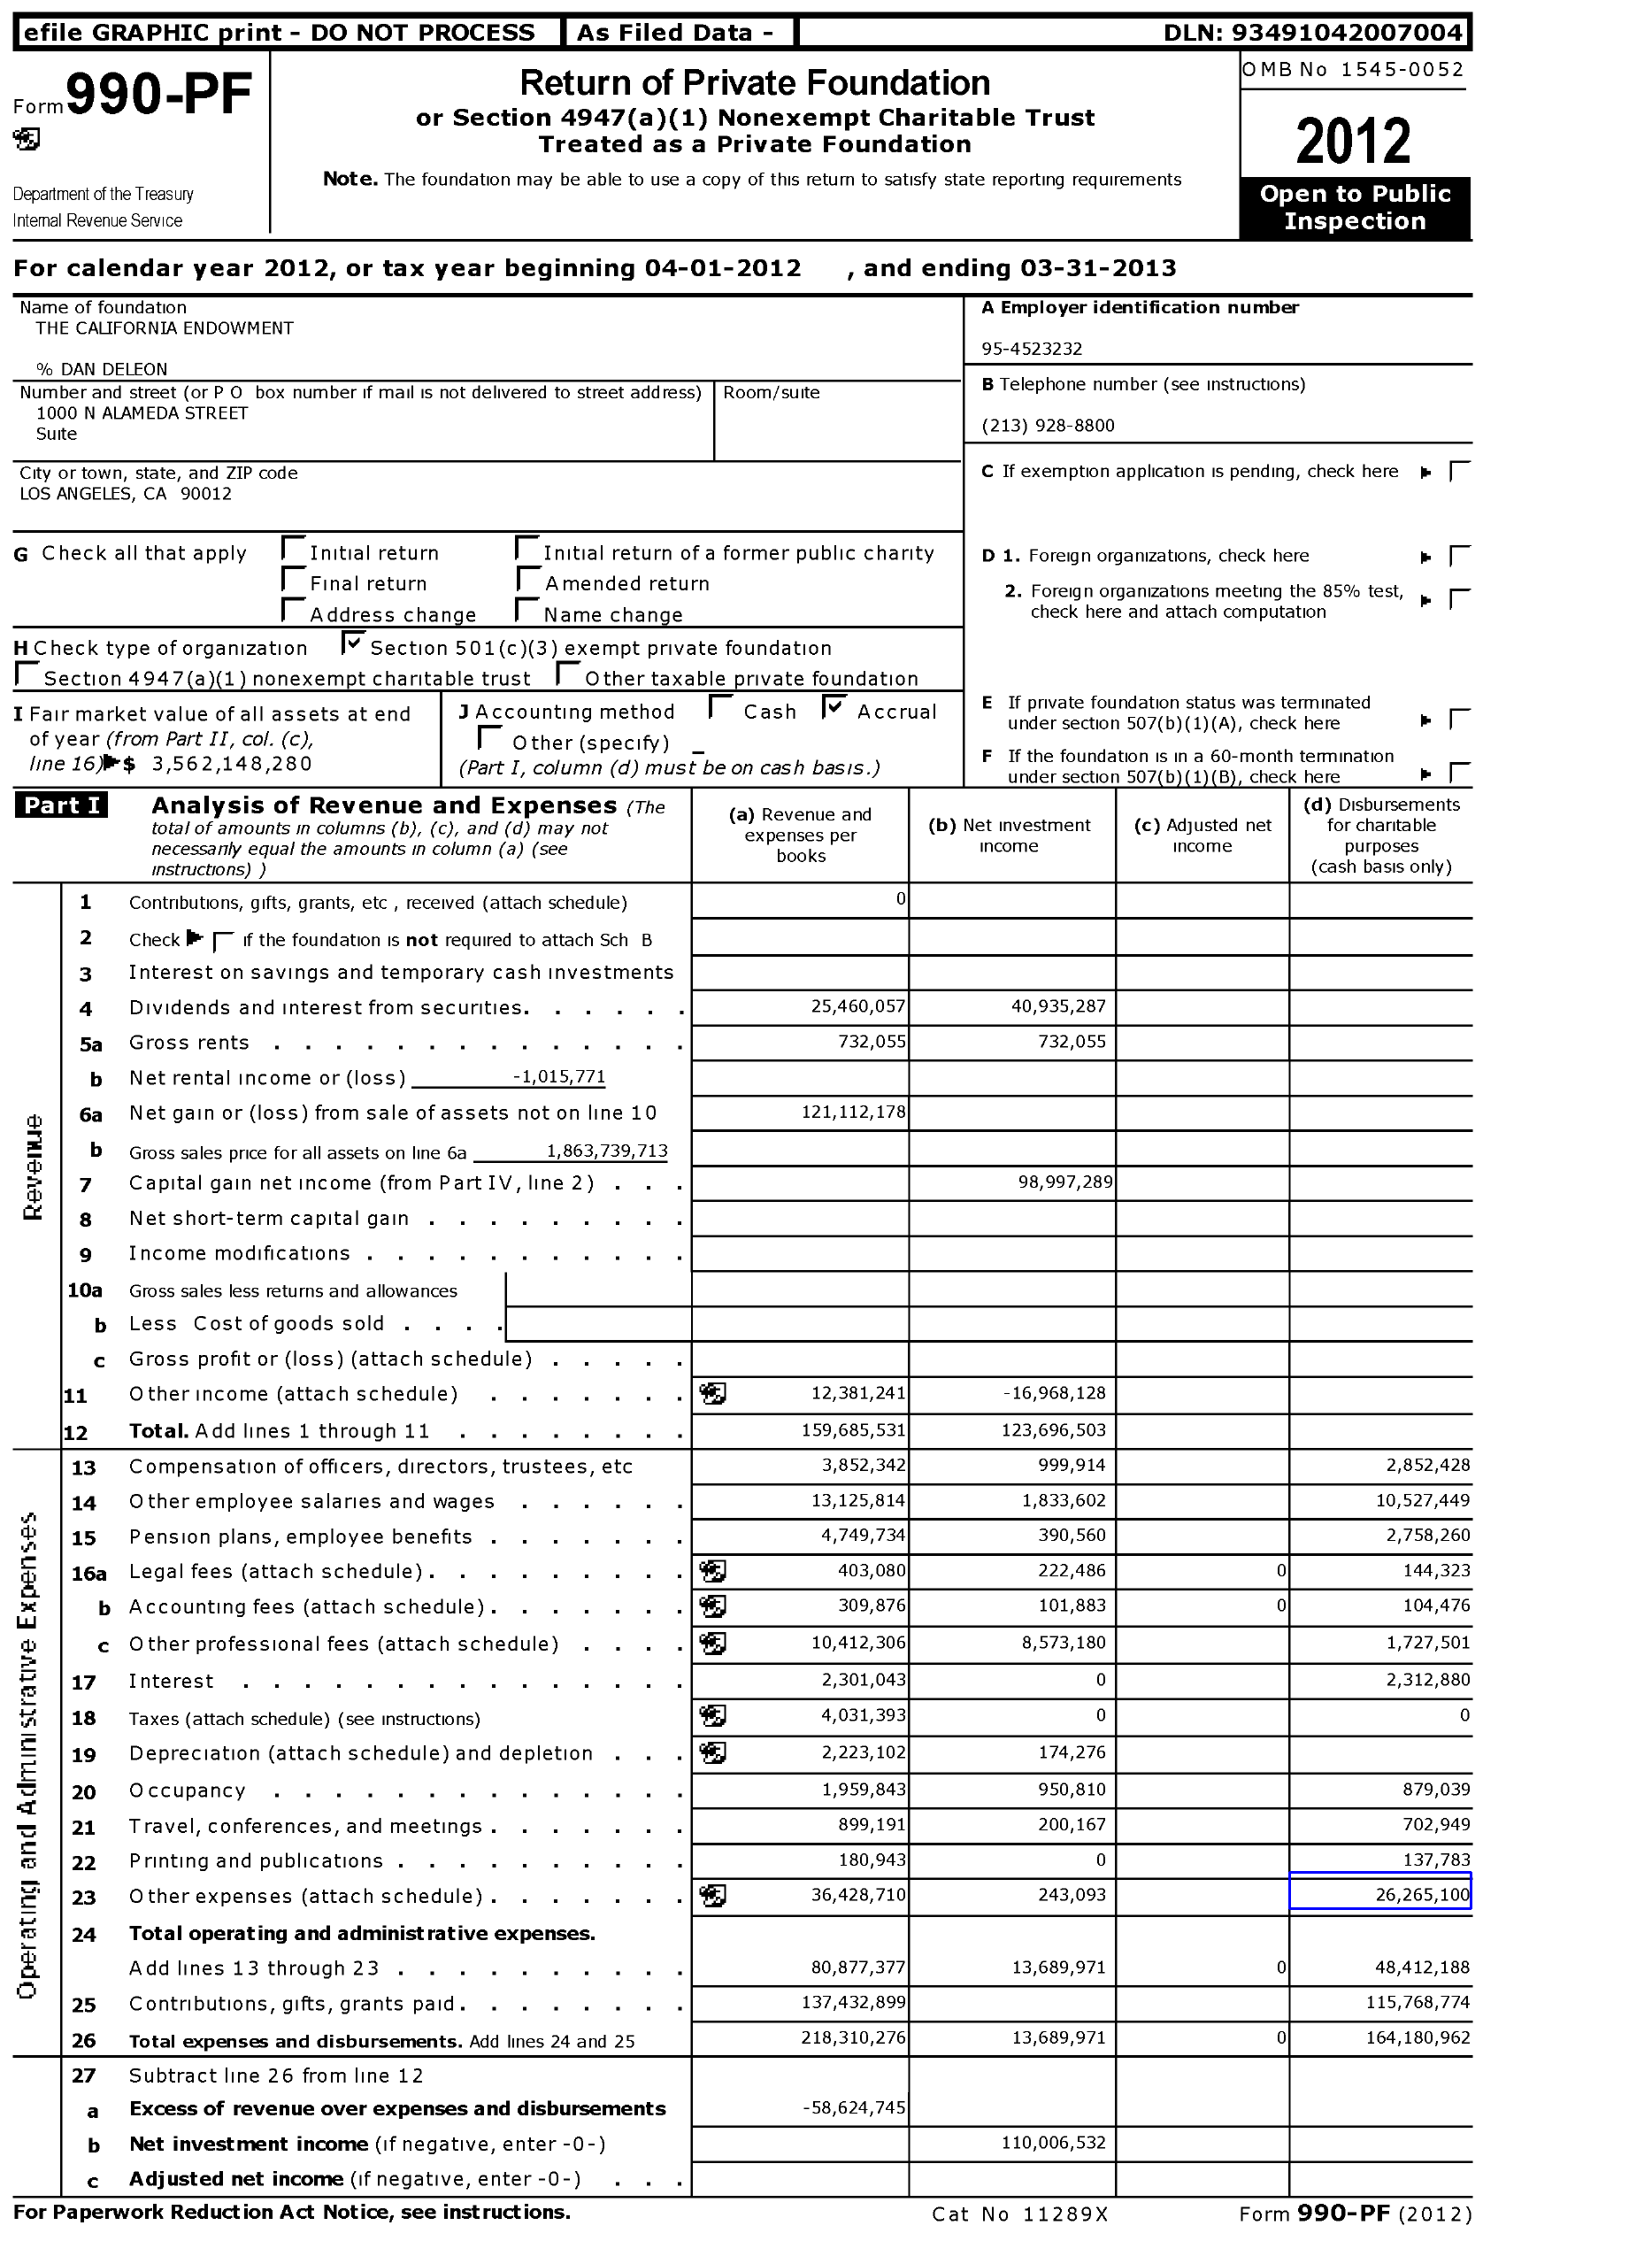

In [40]:
previousLines = 1
lines = 1
oldY = y15
count = 0

while count<12:    
    newY = oldY + (previousLines*height)
    tmpY = newY
    readAT(70,tmpY,710,lines*height + lines)
    readAT(800,tmpY,225,lines*height + lines)
    readAT(1025,tmpY,234,lines*height + lines)
    readAT(1260,tmpY,195,lines*height + lines)
    readAT(1457,tmpY,205,lines*height + lines)
    oldY = newY
    count = count + 1

Image("me.png")

In [41]:

y = 2165
height = 75

readAT(70,y,710,height)
readAT(780,y,245,height)
readAT(1025,y,240,height)
readAT(1260,y,200,height)
readAT(1460,y,230,height)
# Image("me.png")

24 =Total operating and administrative expenses.
Addlinesi3through23 . . 2. 2. 2 ew ew ew ee
---------------------------------------------------------------------------------------
80,877,377
---------------------------------------------------------------------------------------
13,689,971
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
48,412,188
---------------------------------------------------------------------------------------


In [42]:

y = 2250
height = 40

readAT(70,y,710,height)
readAT(785,y,240,height)
readAT(1025,y,240,height)
readAT(1260,y,200,height)
readAT(1460,y,230,height)
#Image("me.png")

25

Contributions, gifts, grants paid.
---------------------------------------------------------------------------------------
137,432,899
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
115,768,774
---------------------------------------------------------------------------------------


In [43]:
y = 2280
height = 40

readAT(70,y,710,height)
readAT(780,y,243,height)
readAT(1023,y,240,height)
readAT(1260,y,200,height)
readAT(1460,y,230,height)
#Image("me.png")

26 ~—‘ Total expenses and disbursements. Add lines 24 and 25
---------------------------------------------------------------------------------------
218,310,276
---------------------------------------------------------------------------------------
13,689,971
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
164,180,962
---------------------------------------------------------------------------------------


In [44]:
y = 2320
height = 85

readAT(70,y,710,height)
readAT(780,y,243,height)
readAT(1023,y,240,height)
readAT(1260,y,200,height)
readAT(1460,y,230,height)
#Image("me.png")

27 = Subtract line 26 from line 12
a __ Excess of revenue over expenses and disbursements
---------------------------------------------------------------------------------------
-58,624,745
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [45]:
y = 2400
height = 40

readAT(70,y,700,height)
readAT(780,y,243,height)
readAT(1023,y,240,height)
readAT(1260,y,200,height)
readAT(1460,y,230,height)
#Image("me.png")

b_ Net investment income (if negative, enter -0-)
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
110,006,532
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [46]:
y = 2440
height = 40

readAT(70,y,700,height)
readAT(780,y,243,height)
readAT(1023,y,240,height)
readAT(1260,y,200,height)
readAT(1460,y,230,height)
# Image("me.png")

c Adjusted net income (if negative, enter -0-)
---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------


In [47]:
import json

with open('page_1.json', 'w') as fp:
    json.dump(arrFrames, fp)

In [48]:
import xlsxwriter

workbook = xlsxwriter.Workbook('page_1.xlsx')
ws = workbook.add_worksheet('Sheet1')
formatFont = workbook.add_format({'bold': False})


arrColumns = ["A","B","C","D","E","F"]

prevY = 0
prevX = 0

row = 0
column = 0

for dictItem in arrFrames:
    tmpY = dictItem["frame"]["y"]
    tmpX = dictItem["frame"]["x"]
    
    if tmpX != prevX and tmpY != prevY:
        row = row + 1
        column = 0
        prevX = tmpX
        prevY = tmpY
    elif tmpX != prevX and tmpY == prevY:
        column = column + 1
        prevX = tmpX
    elif tmpX == prevX and tmpY != prevY:
        row = row + 1
        prevY = tmpY

    if dictItem["type"] == 'static':
        ws.write(arrColumns[column] + '%d' % row, dictItem["value"], formatFont)
    
#ws.set_column(2, 2, 40)

workbook.close()